C:\Users\irfan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Test Results:
--------------------------------------------------
Service Quality Food Quality    Tip Amount (%) 
--------------------------------------------------
2.0             3.0             10.3           
3.0             7.0             12.6           
5.0             5.0             12.7           
8.0             2.0             12.6           
9.0             9.0             16.8           


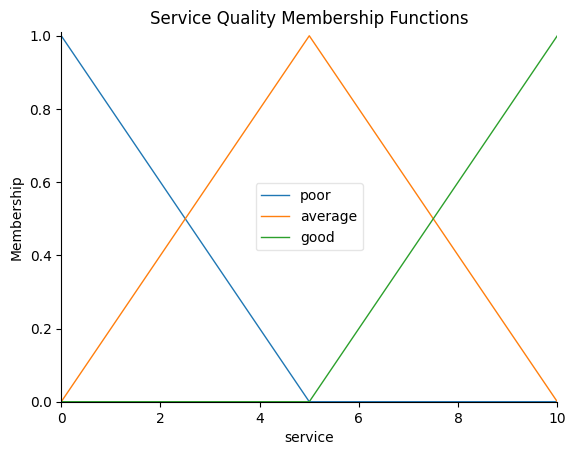

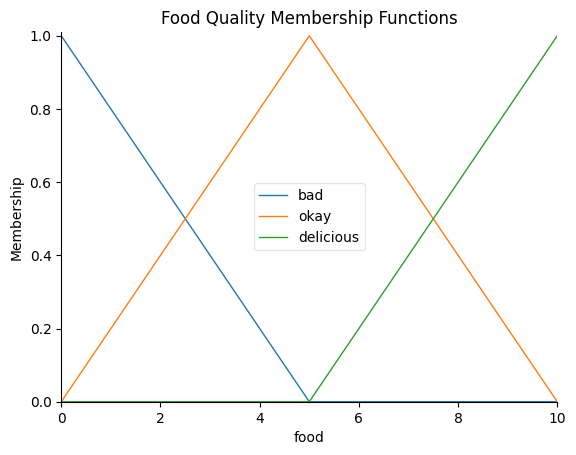

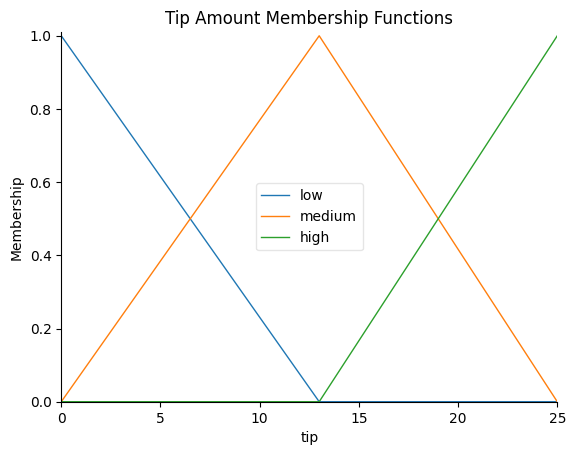

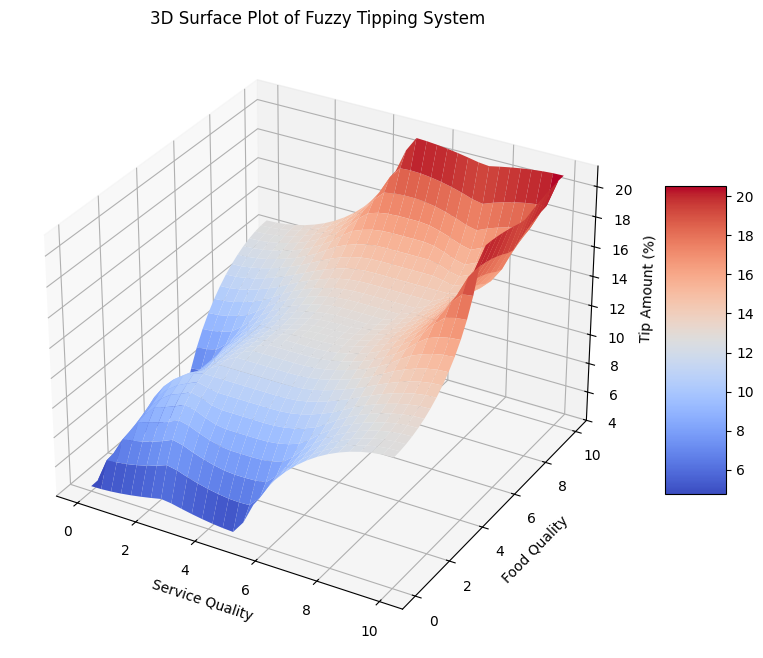

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Step 1: Define Fuzzy Sets and Membership Functions
# -------------------------------------------------

# Create the input and output variables (Antecedents and Consequent)
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Define membership functions for service quality
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

# Define membership functions for food quality
food['bad'] = fuzz.trimf(food.universe, [0, 0, 5])
food['okay'] = fuzz.trimf(food.universe, [0, 5, 10])
food['delicious'] = fuzz.trimf(food.universe, [5, 10, 10])

# Define membership functions for tip amount
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# Visualize the membership functions
service.view()
plt.title('Service Quality Membership Functions')
plt.savefig('service_mf.png')

food.view()
plt.title('Food Quality Membership Functions')
plt.savefig('food_mf.png')

tip.view()
plt.title('Tip Amount Membership Functions')
plt.savefig('tip_mf.png')

# Step 2: Create the Fuzzy Rule Base




# Step 4: Testing
# --------------

# Define test cases
test_cases = [
    {"service": 2.0, "food": 3.0},  # Poor service, bad food
    {"service": 3.0, "food": 7.0},  # Poor service, delicious food
    {"service": 5.0, "food": 5.0},  # Average service, okay food
    {"service": 8.0, "food": 2.0},  # Good service, bad food
    {"service": 9.0, "food": 9.0}   # Good service, delicious food
]

# Test each case and print results
print("Test Results:")
print("-" * 50)
print("{:<15} {:<15} {:<15}".format("Service Quality", "Food Quality", "Tip Amount (%)"))
print("-" * 50)

for i, case in enumerate(test_cases):
    # Set input values
    tipping.input['service'] = case["service"]
    tipping.input['food'] = case["food"]
    
    # Compute the result
    tipping.compute()
    
    # Print the result
    print("{:<15.1f} {:<15.1f} {:<15.1f}".format(
        case["service"], case["food"], tipping.output['tip']))

# Create a 3D surface plot to visualize the mapping
# ------------------------------------------------
x = np.linspace(0, 10, 30)
y = np.linspace(0, 10, 30)
x, y = np.meshgrid(x, y)
z = np.zeros_like(x)

for i in range(30):
    for j in range(30):
        tipping.input['service'] = x[i, j]
        tipping.input['food'] = y[i, j]
        tipping.compute()
        z[i, j] = tipping.output['tip']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=True)

ax.set_xlabel('Service Quality')
ax.set_ylabel('Food Quality')
ax.set_zlabel('Tip Amount (%)')
ax.set_title('3D Surface Plot of Fuzzy Tipping System')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('3d_surface.png')

# Display all plots
plt.show()

In [ ]:
# ----------------------------------

# Define fuzzy rules
rule1 = ctrl.Rule(service['poor'] & food['bad'], tip['low'])
rule2 = ctrl.Rule(service['poor'] & food['okay'], tip['low'])
rule3 = ctrl.Rule(service['poor'] & food['delicious'], tip['medium'])
rule4 = ctrl.Rule(service['average'] & food['bad'], tip['low'])
rule5 = ctrl.Rule(service['average'] & food['okay'], tip['medium'])
rule6 = ctrl.Rule(service['average'] & food['delicious'], tip['high'])
rule7 = ctrl.Rule(service['good'] & food['bad'], tip['medium'])
rule8 = ctrl.Rule(service['good'] & food['okay'], tip['high'])
rule9 = ctrl.Rule(service['good'] & food['delicious'], tip['high'])

In [ ]:
# Step 3: Implement the Fuzzy Inference System
# -------------------------------------------

# Create and set up the control system
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)